In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

1. Loading dan Review data

In [32]:
df = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [4]:
df.shape

(8693, 14)

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [8]:
df.isnull().values.any()

True

In [20]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

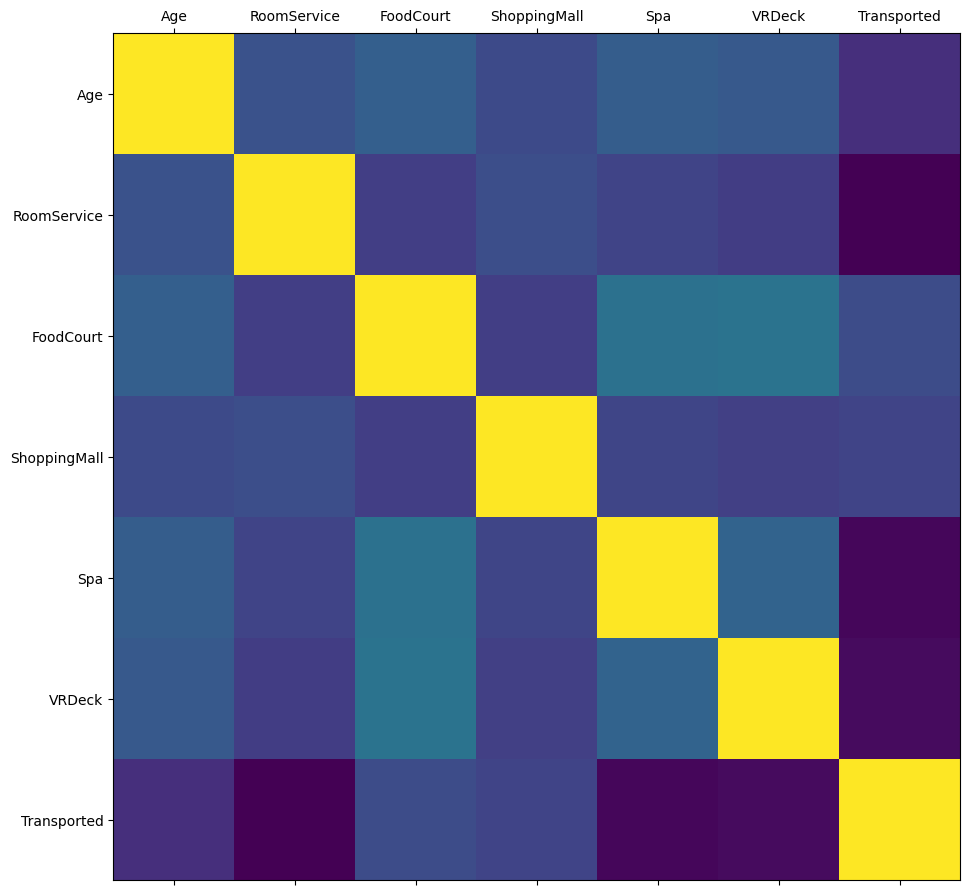

In [24]:
# Cek apakah ada corelasi, kalo ada korelasi warnanya akan kuning. Dan kalo kolom-kolm tsb ada yang berelasi kuning pada ddua kolom, 
# maka kita bisa menghapus salah satunya, karena data tsb sama.
plot_corr(df)

In [22]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [30]:
# num_obs = len(df)
# num_true = len(df.loc[df['Transported'] > 0])
# num_false = len(df.loc[df['Transported'] <= 0])
# print("Jumlah transported : {0} ({1:2.2f}%)").format(num_true, (num_true/num_obs * 100))

In [96]:
# Split data (70% tranining, 30% testing)
# Data splitting
from sklearn.model_selection import train_test_split
feature_col_names = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]
predicted_class_names = ['Transported']
x = df[feature_col_names].values
y = df[predicted_class_names].values

x_pred = df_test[feature_col_names].values

# y_pred = df_test[predicted_class_names].values

# split_test_size = 0.30
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

# Cek persentase data train dan test
# print("data train".format((len(x_train)/len(df.index)) * 100))
# print("data test".format((len(x_test)/len(df.index)) * 100))

In [53]:
df.dropna(axis=1, how="all", inplace=True)

In [73]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [72]:
# df["College"].fillna("No College", inplace=True)
df['HomePlanet'].fillna("no home", inplace=True)
df['CryoSleep'].fillna("no Cry", inplace=True)
df['Cabin'].fillna("no cabin", inplace=True)
df['Destination'].fillna("no destination", inplace=True)
df['VIP'].fillna("no VIP", inplace=True)
df['Name'].fillna("no name", inplace=True)


df['Age'].fillna(df['Age'].mean(), inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

In [86]:
df_test['HomePlanet'].fillna("no home", inplace=True)
df_test['CryoSleep'].fillna("no Cry", inplace=True)
df_test['Cabin'].fillna("no cabin", inplace=True)
df_test['Destination'].fillna("no destination", inplace=True)
df_test['VIP'].fillna("no VIP", inplace=True)
df_test['Name'].fillna("no name", inplace=True)


df_test['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df_test['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df_test['Spa'].fillna(df['Spa'].mean(), inplace=True)
df_test['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df_test['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

In [77]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x, y.ravel())

GaussianNB()

In [80]:
nb_predict_train = nb_model.predict(x)

from sklearn import metrics 
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y, nb_predict_train)))

Accuracy: 0.6719


In [97]:
# nb_predict_test = nb_model.predict(x_pred)
# print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y, nb_predict_test)))